In [1]:
import kcorrect.kcorrect
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [3]:
at2018hyz = {'u_mag': 19.195, 'err_u': 0.034,
           'g_mag': 17.605, 'err_g': 0.005,
           'r_mag': 17.040, 'err_r': 0.005,
           'i_mag': 16.755, 'err_i': 0.005,
           'z_mag': 16.546, 'err_z': 0.0014,
            'z':  0.0457}

In [34]:
kc_sdss = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'],
                                    redshift_range=[0.,6.5])

redshift = at2018hyz['z']
mags = np.array([at2018hyz[k] for k in ['u_mag', 'g_mag', 'r_mag', 'i_mag', 'z_mag']])
errs = np.array([at2018hyz[k] for k in ['err_u', 'err_g', 'err_r', 'err_i', 'err_z']])
maggies, ivar = kcorrect.utils.sdss_asinh_to_maggies(mags, errs)
coeffs = kc_sdss.fit_coeffs(redshift=redshift, maggies=maggies, ivar = ivar)

In [35]:
import numpy as np
import sncosmo
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants as const
import sys
sys.path.append('../')
from scripts import tde_utils

In [65]:
tde_mags = []
gal_mags = []
snia_mags = []

abs_r = kc_sdss.absmag(redshift = redshift, maggies = maggies, 
                       ivar=ivar, coeffs = coeffs)[2]

for z in np.linspace(1, 6.5, 100):
    source = tde_utils.BlackBodySource(30000)
    bb_model = sncosmo.Model(source=source)
    bb_model.set(z=z)

    luminosity_distance = cosmo.luminosity_distance(z)
    
    filter_zstretched_mag = bb_model.bandmag('sdssr', 'ab', 0)
    app_mag = filter_zstretched_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
    #print(filter_zstretched_mag, app_mag)#bb_model.source_peakabsmag('f062', 'ab'))
    tde_mags.append(app_mag)
    
    galaxy_k = kc_sdss.kcorrect(redshift = z, coeffs=coeffs)
    k_r = galaxy_k[2]
    app_r = abs_r + 5*np.log10(luminosity_distance/(10 * u.parsec)) + k_r
    print(abs_r, app_r)
    gal_mags.append(app_r)
    
    
    snia_model = sncosmo.Model(source='salt2-extended')
    snia_model.set(z=z)
    snia_model.set(x1=0, c=0, x0= 1051627384124.3574, t0=0)
    try:
        snia_zstretched_mag = snia_model.bandmag('sdssr', 'ab', 0)
        snia_app_mag = snia_zstretched_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
        snia_mags.append(snia_app_mag)
    except Exception as e:
        print(e)
        print(f'redshift {z} out of snia model range, appending 0')
        snia_mags.append(np.nan)

-19.6524127607 26.384324069047786
-19.6524127607 26.658284241585392
-19.6524127607 26.91310943083257
-19.6524127607 27.17038061341522
-19.6524127607 27.440324152824832
-19.6524127607 27.702435282872255
-19.6524127607 27.961266282727696
-19.6524127607 28.175467717961357
-19.6524127607 28.327110683577164
-19.6524127607 28.48160518053093
-19.6524127607 28.648973724163874
-19.6524127607 28.76842874724391
-19.6524127607 28.853248705719764
-19.6524127607 28.932088285982804
-19.6524127607 29.01758536716904
-19.6524127607 29.08300611982948
-19.6524127607 29.146587943428717
-19.6524127607 29.228654886920413
-19.6524127607 29.322369554470978
-19.6524127607 29.419166503490054
-19.6524127607 29.517944424276408
-19.6524127607 29.61819848783975
bandpass 'sdssr' [5380, .., 7040] outside spectral range [5383.33, .., 79135]
redshift 2.1666666666666665 out of snia model range, appending 0
-19.6524127607 29.727492292802758
bandpass 'sdssr' [5380, .., 7040] outside spectral range [5477.78, .., 80523.3]
re

/Users/mitchell/opt/anaconda3/lib/python3.9/site-packages/kcorrect/kcorrect.py:351: RuntimeWarning: divide by zero encountered in log10
  kcorrect = - 2.5 * np.log10(maggies_in[self.imap] /


In [66]:
len(tde_mags), len(gal_mags)

(100, 100)

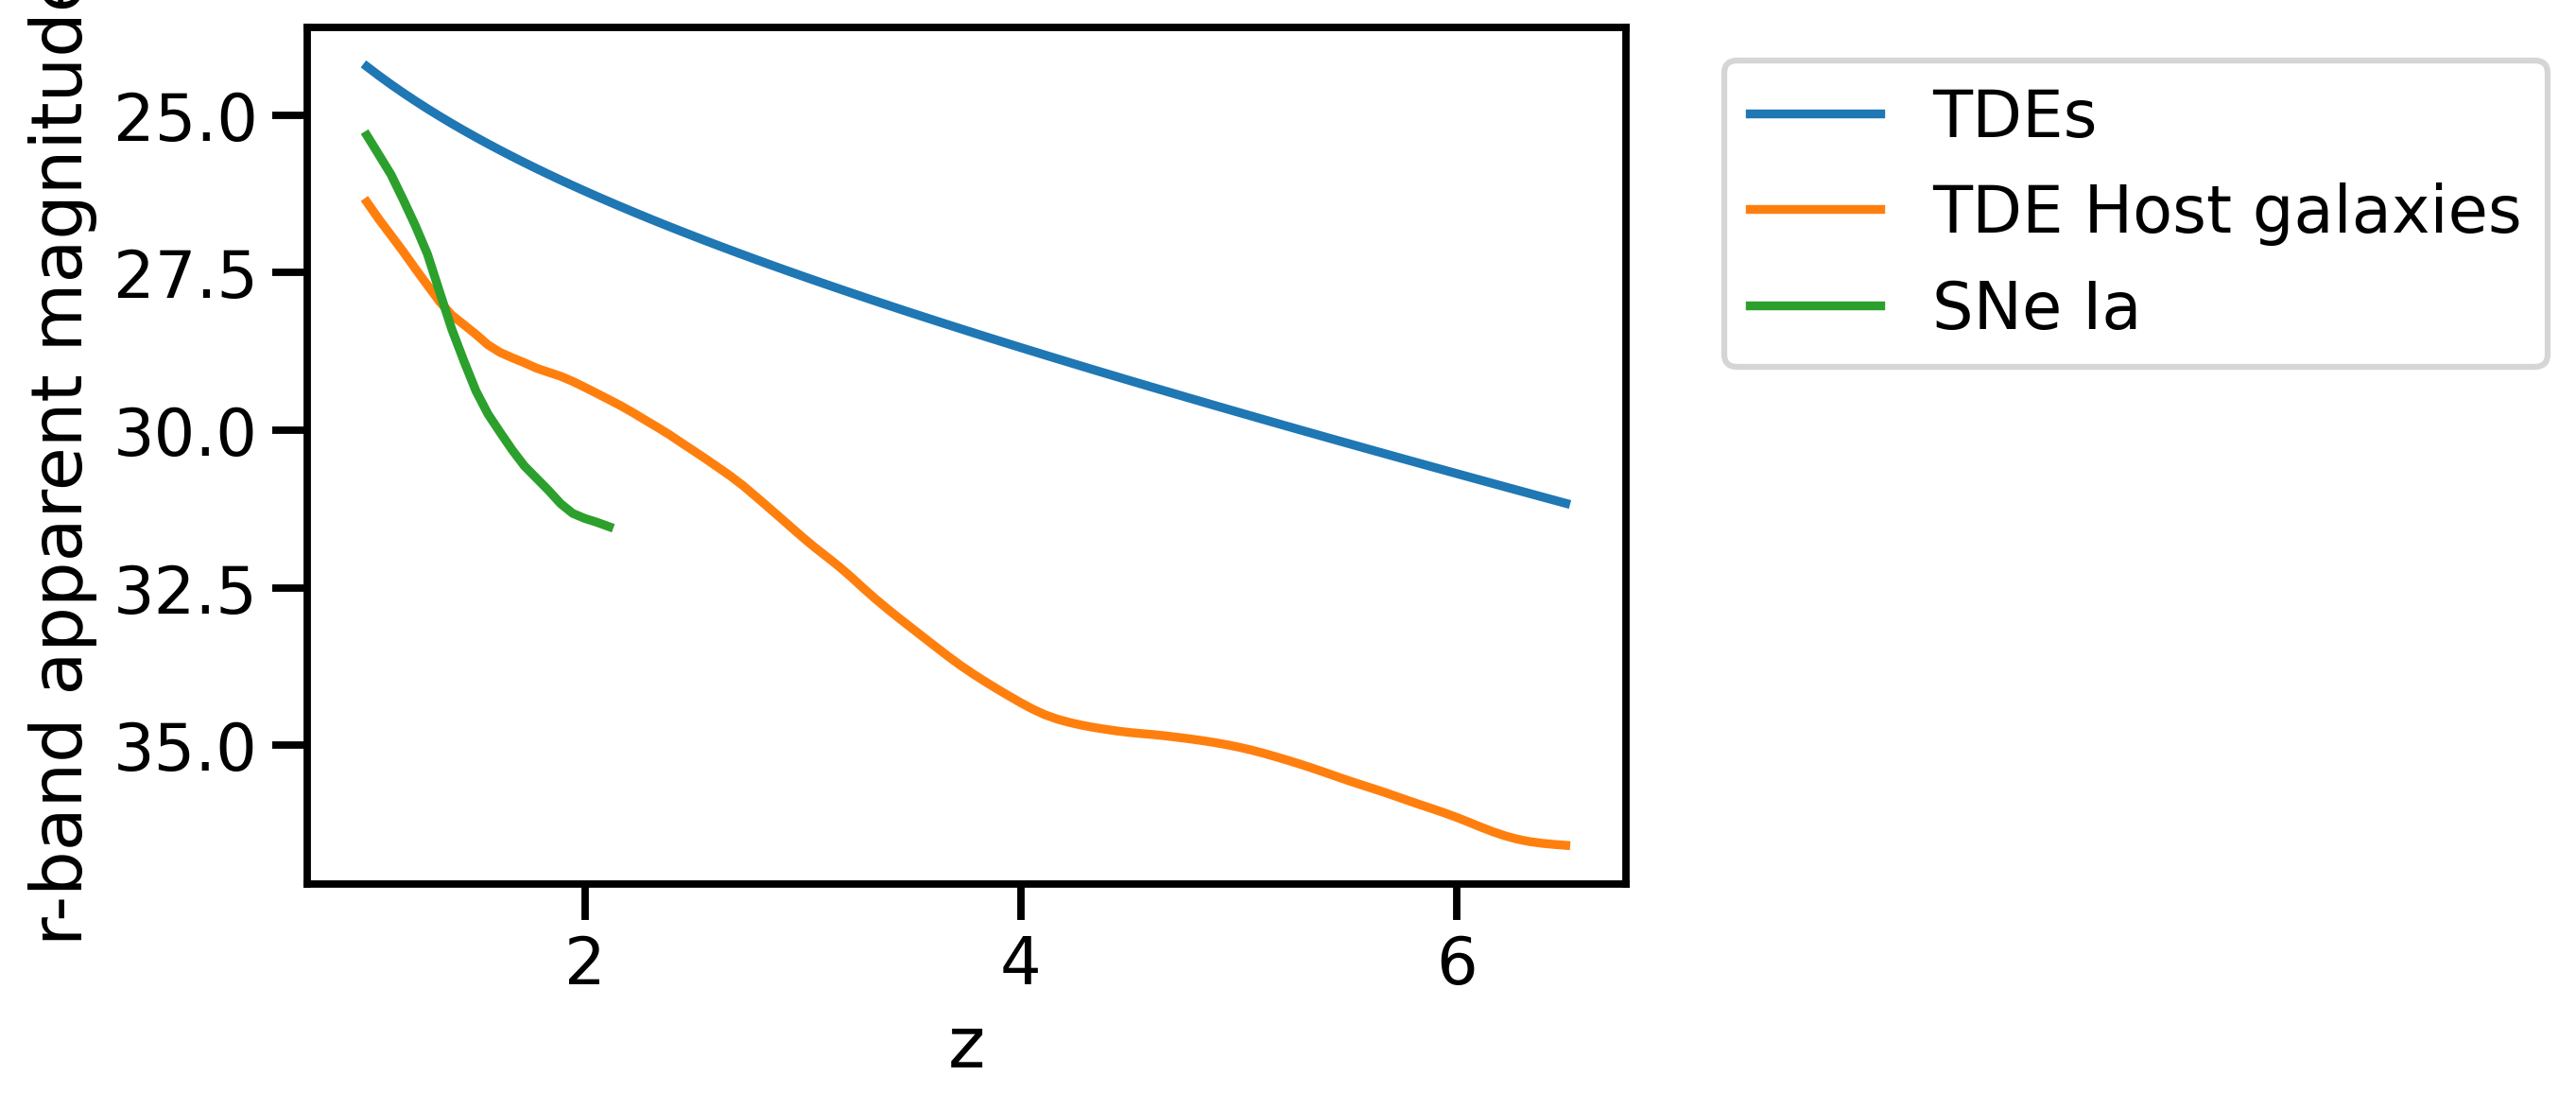

In [73]:
plt.figure(dpi = 300)
plt.plot(np.linspace(1, 6.5, 100), tde_mags, label = 'TDEs')
plt.plot(np.linspace(1, 6.5, 100), gal_mags, label = 'TDE Host galaxies')
plt.plot(np.linspace(1, 6.5, 100), snia_mags, label = 'SNe Ia')

plt.xlabel('z')
plt.ylabel('r-band apparent magnitude')

ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymax, ymin)
plt.legend(bbox_to_anchor=[1.05, 1])
plt.show()

In [60]:
snia_model = sncosmo.Model(source='salt3-extended')

Exception: 'salt3-extended' not in registry. Registered names: 'snana-2007kw', 'v19-2009ip', 'sugar', 'snana-2006ez', 's11-2006fo', 'snana-2007ky', 'v19-2007uy-corr', 'snemo2', 'whalen-z25b', 'snana-2006ns', 'v19-2012ap', 'v19-2007pk', 'v19-2007y-corr', 'v19-2008bo', 'v19-2002ap-corr', 'v19-2009kr-corr', 'v19-2009jf', 'v19-2004fe', 'v19-2011ei-corr', 'v19-2007gr', 'v19-2011ei', 'v19-2016bkv', 'v19-2012aw-corr', 'v19-2009ib-corr', 'whalen-z40g', 'v19-2013df', 'v19-2013fs', 'v19-2013ge', 'snana-2006kn', 's11-2005hm', 'v19-2016gkg', 'v19-2012a-corr', 's11-2006jo', 'v19-2009jf-corr', 's11-2006jl', 'v19-2013by', 'snana-2007lb', 'v19-2008fq-corr', 'v19-2013am', 'snana-2007lz', 'snana-2007nr', 'v19-1999dn', 'snf-2011fe', 'v19-iptf13bvn', 'v19-2011fu', 'v19-2016gkg-corr', 'v19-asassn14jb', 'v19-2008ax', 'v19-asassn15oz-corr', 'snana-sdss014475', 'v19-2008d', 'v19-1987a-corr', 'whalen-z25d', 'v19-2006ep-corr', 'snana-2006jo', 'snana-2007ms', 'v19-2008bj', 'v19-2011ht', 'v19-2013ej', 'snana-2007pg', 'v19-2007od', 'v19-2010al-corr', 'snana-2006ix', 'v19-2013ej-corr', 'v19-2007ru', 'v19-2007gr-corr', 'v19-2008aq', 'v19-2013ab', 'v19-2013ge-corr', 'v19-2004aw-corr', 'v19-2006t', 'v19-2008bo-corr', 'v19-2011bm', 'v19-2006t-corr', 'snana-04d1la', 'v19-2011ht-corr', 'snana-2007ll', 'mlcs2k2', 'v19-2014g', 'hsiao-subsampled', 'v19-2009bb', 'nugent-hyper', 'v19-2011dh', 'v19-2013df-corr', 'snana-2006ep', 'v19-2004gq', 'v19-2004gq-corr', 'whalen-z15b', 'v19-2009n-corr', 'v19-2013ab-corr', 'salt2-h17', 'v19-2007ru-corr', 'v19-2013am-corr', 'nugent-sn2p', 'v19-2012au', 'snemo15', 'v19-2005bf', 'snana-2007y', 'snana-2004ib', 'v19-2009iz', 'v19-2004et', 'v19-2009bw-corr', 'snana-2007nv', 'v19-1998bw', 'v19-1999em', 'v19-2002ap', 'v19-2008in', 'v19-2014g-corr', 'v19-1993j-corr', 'v19-2006aa', 'v19-2005bf-corr', 'v19-2004gv-corr', 'v19-2009ip-corr', 'v19-2009kr', 'v19-2011bm-corr', 'v19-2007uy', 'whalen-z40b', 'nugent-sn2n', 'salt2', 'v19-asassn14jb-corr', 'v19-1987a', 'v19-2005hg', 'v19-2006aj-corr', 'v19-2016bkv-corr', 'snana-2004hx', 'v19-2008bj-corr', 'salt2-extended', 'snana-2007nw', 'snana-2007ny', 'whalen-z25g', 'nugent-sn91t', 'snana-04d4jv', 'v19-2008fq', 's11-2005gi', 'nugent-sn1bc', 'v19-2008d-corr', 'v19-2012aw', 'whalen-z15d', 'v19-asassn15oz', 'v19-2008in-corr', 'snana-2005hm', 'v19-2009bw', 'v19-2012au-corr', 'salt3', 'salt2-extended-h17', 'v19-2004fe-corr', 'v19-2006aj', 'v19-2008aq-corr', 'v19-2011fu-corr', 'v19-2011hs', 'v19-2007pk-corr', 'snana-2006fo', 's11-2004hx', 'v19-2009dd', 'v19-2013fs-corr', 'v19-1999em-corr', 'v19-2008ax-corr', 'v19-1994i-corr', 'snana-2004gq', 'snana-2007lx', 'snana-2006gq', 'v19-2004et-corr', 'snana-2006iw', 'snemo7', 'v19-2016x', 'snana-2004gv', 'nugent-sn1a', 'v19-2007y', 'hsiao', 'v19-2012a', 'v19-2006aa-corr', 'snana-2007md', 's11-2005lc', 'snana-2004fe', 'v19-2004gv', 'v19-2009ib', 'v19-1994i', 'v19-2006ep', 'v19-2011dh-corr', 'snana-2007iz', 'nugent-sn91bg', 'v19-2016x-corr', 'snana-2007og', 'v19-2007od-corr', 'v19-2013by-corr', 's11-2005hl', 'v19-iptf13bvn-corr', 'nugent-sn2l', 'v19-2009n', 'whalen-z15g', 'v19-2009bb-corr', 'v19-2009dd-corr', 'v19-2012ap-corr', 'v19-1993j', 'snana-sdss004012', 'v19-2011hs-corr', 'snana-2006jl', 'v19-2005hg-corr', 'v19-1998bw-corr', 'snana-2007ld', 'v19-2004gt-corr', 'v19-2009iz-corr', 'snana-2006kv', 'snana-2007nc', 'snana-2005gi', 'v19-1999dn-corr', 'snana-2007lj', 'v19-2004gt', 'snana-2006lc', 'v19-2010al', 'v19-2004aw'

In [63]:
sources = ['snana-2007kw', 'v19-2009ip', 'sugar', 'snana-2006ez', 's11-2006fo', 'snana-2007ky', 'v19-2007uy-corr', 'snemo2', 'whalen-z25b', 'snana-2006ns', 'v19-2012ap', 'v19-2007pk', 'v19-2007y-corr', 'v19-2008bo', 'v19-2002ap-corr', 'v19-2009kr-corr', 'v19-2009jf', 'v19-2004fe', 'v19-2011ei-corr', 'v19-2007gr', 'v19-2011ei', 'v19-2016bkv', 'v19-2012aw-corr', 'v19-2009ib-corr', 'whalen-z40g', 'v19-2013df', 'v19-2013fs', 'v19-2013ge', 'snana-2006kn', 's11-2005hm', 'v19-2016gkg', 'v19-2012a-corr', 's11-2006jo', 'v19-2009jf-corr', 's11-2006jl', 'v19-2013by', 'snana-2007lb', 'v19-2008fq-corr', 'v19-2013am', 'snana-2007lz', 'snana-2007nr', 'v19-1999dn', 'snf-2011fe', 'v19-iptf13bvn', 'v19-2011fu', 'v19-2016gkg-corr', 'v19-asassn14jb', 'v19-2008ax', 'v19-asassn15oz-corr', 'snana-sdss014475', 'v19-2008d', 'v19-1987a-corr', 'whalen-z25d', 'v19-2006ep-corr', 'snana-2006jo', 'snana-2007ms', 'v19-2008bj', 'v19-2011ht', 'v19-2013ej', 'snana-2007pg', 'v19-2007od', 'v19-2010al-corr', 'snana-2006ix', 'v19-2013ej-corr', 'v19-2007ru', 'v19-2007gr-corr', 'v19-2008aq', 'v19-2013ab', 'v19-2013ge-corr', 'v19-2004aw-corr', 'v19-2006t', 'v19-2008bo-corr', 'v19-2011bm', 'v19-2006t-corr', 'snana-04d1la', 'v19-2011ht-corr', 'snana-2007ll', 'mlcs2k2', 'v19-2014g', 'hsiao-subsampled', 'v19-2009bb', 'nugent-hyper', 'v19-2011dh', 'v19-2013df-corr', 'snana-2006ep', 'v19-2004gq', 'v19-2004gq-corr', 'whalen-z15b', 'v19-2009n-corr', 'v19-2013ab-corr', 'salt2-h17', 'v19-2007ru-corr', 'v19-2013am-corr', 'nugent-sn2p', 'v19-2012au', 'snemo15', 'v19-2005bf', 'snana-2007y', 'snana-2004ib', 'v19-2009iz', 'v19-2004et', 'v19-2009bw-corr', 'snana-2007nv', 'v19-1998bw', 'v19-1999em', 'v19-2002ap', 'v19-2008in', 'v19-2014g-corr', 'v19-1993j-corr', 'v19-2006aa', 'v19-2005bf-corr', 'v19-2004gv-corr', 'v19-2009ip-corr', 'v19-2009kr', 'v19-2011bm-corr', 'v19-2007uy', 'whalen-z40b', 'nugent-sn2n', 'salt2', 'v19-asassn14jb-corr', 'v19-1987a', 'v19-2005hg', 'v19-2006aj-corr', 'v19-2016bkv-corr', 'snana-2004hx', 'v19-2008bj-corr', 'salt2-extended', 'snana-2007nw', 'snana-2007ny', 'whalen-z25g', 'nugent-sn91t', 'snana-04d4jv', 'v19-2008fq', 's11-2005gi', 'nugent-sn1bc', 'v19-2008d-corr', 'v19-2012aw', 'whalen-z15d', 'v19-asassn15oz', 'v19-2008in-corr', 'snana-2005hm', 'v19-2009bw', 'v19-2012au-corr', 'salt3', 'salt2-extended-h17', 'v19-2004fe-corr', 'v19-2006aj', 'v19-2008aq-corr', 'v19-2011fu-corr', 'v19-2011hs', 'v19-2007pk-corr', 'snana-2006fo', 's11-2004hx', 'v19-2009dd', 'v19-2013fs-corr', 'v19-1999em-corr', 'v19-2008ax-corr', 'v19-1994i-corr', 'snana-2004gq', 'snana-2007lx', 'snana-2006gq', 'v19-2004et-corr', 'snana-2006iw', 'snemo7', 'v19-2016x', 'snana-2004gv', 'nugent-sn1a', 'v19-2007y', 'hsiao', 'v19-2012a', 'v19-2006aa-corr', 'snana-2007md', 's11-2005lc', 'snana-2004fe', 'v19-2004gv', 'v19-2009ib', 'v19-1994i', 'v19-2006ep', 'v19-2011dh-corr', 'snana-2007iz', 'nugent-sn91bg', 'v19-2016x-corr', 'snana-2007og', 'v19-2007od-corr', 'v19-2013by-corr', 's11-2005hl', 'v19-iptf13bvn-corr', 'nugent-sn2l', 'v19-2009n', 'whalen-z15g', 'v19-2009bb-corr', 'v19-2009dd-corr', 'v19-2012ap-corr', 'v19-1993j', 'snana-sdss004012', 'v19-2011hs-corr', 'snana-2006jl', 'v19-2005hg-corr', 'v19-1998bw-corr', 'snana-2007ld', 'v19-2004gt-corr', 'v19-2009iz-corr', 'snana-2006kv', 'snana-2007nc', 'snana-2005gi', 'v19-1999dn-corr', 'snana-2007lj', 'v19-2004gt', 'snana-2006lc', 'v19-2010al', 'v19-2004aw']

In [ ]:
# CEERS: Galaxy mass 10^8-10^9 M_sun, BH mass 10^6-10^7 M_sun
# very high SFRs, standard IMF (maybe top heavy?)
# Density goess rho_local(1+z)^3
# cross section = sigma_local (1+z^(1/2))
# sigma = r_tidal^2 = M_BH^(2/3)
# r_gal goes (1+z)^(-1)
# TDE Population Sampler: you can sample an upper (stellar) mass range you couldn't before